### ***Problem07***
---

In [2]:
### Import library & data set 
# library
from google.colab import drive
drive.mount("/content/drive") 
import numpy as np
import pandas as pd
import random
from keras.datasets import fashion_mnist
from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer 
import matplotlib.pyplot as plt
import seaborn as sns
# df function 
def to_df(df):
  df = pd.read_csv(df)
  df = pd.DataFrame(df)
  return df 

Mounted at /content/drive


In [ ]:
### dbscan 
"""Try to implement data sets several times but takes too much tiem to compute and systems down repeatedly. However, it obviously works."""
# point, coordinate, and cluster_idx
class Point():
    def __init__(self, coordinate):
        self.coordinate = coordinate
        self.cluster_idx = None
        
    # disignate cluster 
    def cluster(self, cluster_idx):
        self.cluster_idx = cluster_idx

# dbscan main
class dbscan():
    def __init__(self, epsi, min_points):
        self.epsi = epsi
        self.min_points = min_points
    
    def get_distnace(self, x1, x2):
        return np.sum((x1-x2)**2)**0.5

    def find_neighbor(self, core_point, other_points):
        neighbor_indices = []
        
        for idx in range(len(other_points)):
          if self.get_distnace(core_point.coordinate, other_points[idx].coordinate) <= self.epsi:
                neighbor_indices.append(idx)  
        return neighbor_indices

    # Get all points of df
    def fit(self, df):
        points = []
        for idx, row in df.iterrows():
          """x1 be index, x2 be row"""
          points.append(Point(np.linalg.norm(row.to_numpy())))

        # free, core points for while function                    
        free_point_indices = set(range(len(points)))
        core_point_indices = set()
        cluster_count = 0

        # dicriminate value into cluster 
        while len(free_point_indices) > 0:
            """random for initiate"""
            if len(core_point_indices) == 0:
                start_idx = random.choice(list(free_point_indices))
                core_point_indices.add(start_idx)
                free_point_indices.remove(start_idx)
                points[start_idx].cluster(cluster_count)

            while len(core_point_indices) > 0:
                picked_core_point_idx = core_point_indices.pop()
                neighbor_indices = self.find_neighbor(points[picked_core_point_idx], points)
                """Collect neighbor_indicies and if it overs min_points, get in the cluster and move next cluster"""
                if len(neighbor_indices) >= (self.min_points - 1):
                    for neighbor_idx in neighbor_indices:
                        if neighbor_idx in free_point_indices:
                            points[neighbor_idx].cluster(cluster_count)
                            if neighbor_idx in free_point_indices:
                                core_point_indices.add(neighbor_idx)
                                free_point_indices.remove(neighbor_idx)      
            cluster_count += 1
        return points

In [3]:
### 20ng 
categories = [
    "alt.atheism","comp.graphics","comp.sys.ibm.pc.hardware","comp.sys.mac.hardware","comp.windows.x","misc.forsale","rec.autos","rec.motorcycles","rec.sport.baseball",
    "rec.sport.hockey","sci.crypt","sci.electronics","sci.med","sci.space","soc.religion.christian","talk.politics.guns","talk.politics.mideast","talk.politics.misc",
    "talk.religion.misc","comp.os.ms-windows.misc",]
newsgroups = fetch_20newsgroups(categories=categories)
# Normalize features (TF-IDF) 
vectorizer = TfidfVectorizer() 
df_20ng = vectorizer.fit_transform(newsgroups.data) 
df_20ng = df_20ng[:2000]
# fitting
model = DBSCAN(eps=3, min_samples=2).fit(df_20ng) 
cluster = model.labels_
cluster

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
### Answer for 20 news groups data set
"""
By using Tfidfvectorizer, we can classify and cluster the 20 news groups data points. 
Those vectors contain information of location. Therefroe, each clustered data points has their meanings. 
"""

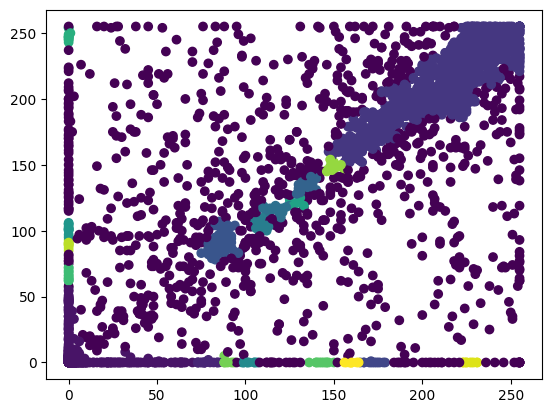

In [ ]:
### fashion 
"""Try multi-layer distance"""
# import 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = np.reshape(X_train, (-1, 2))
X_train = X_train[:5000]
# fitting
model = DBSCAN(eps=5, min_samples=10).fit(X_train) 
cluster = model.labels_
# plot
X_train = pd.DataFrame(X_train, columns=["x", "y"])
plt.scatter(X_train['x'], X_train['y'], c=cluster) 

In [1]:
### Answer for fashion data set
"""
The fashion data set is a form of 28 x 28. Therefore it does not contain the meaningful result even though reshape the data points to 2 features. 
The imamge data set does not fit for the dbscan clustering model.
"""

'\nThe fashion data is a form of 28 x 28 features. Therefore it does not contain the meaningful result even though reshape the data points to 2 features. \n'

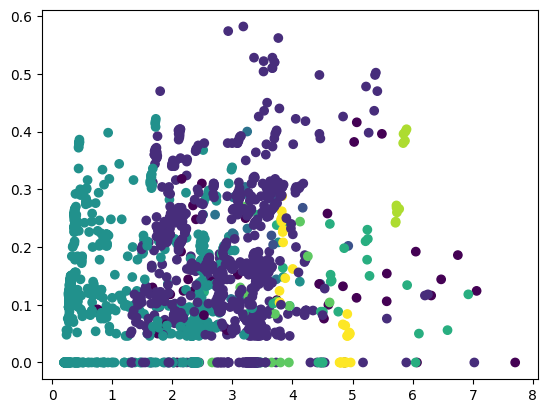

In [ ]:
### household
hh = "/content/drive/MyDrive/DS5230_Unsupervised Machine Learning/Assignments/HW02B/household_power_consumption.txt"
hh = pd.read_csv(hh, sep = ';',
                parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'],
                index_col='dt')
hh = hh.reset_index(drop=True)
hh = hh[:2000]
hh = pd.DataFrame(hh)
# fitting
model = DBSCAN(eps=5, min_samples=10).fit(hh) 
cluster = model.labels_
cluster
# plot
plt.scatter(hh['Global_active_power'], hh['Global_reactive_power'], c=cluster) 
plt.show()

In [ ]:
### Answer for the household data set
"""
Using dbscan can classify and cluster the data points, alos, it would be much helpful if we normalize each columns.
This is because each data point of features contains their own meanings and is independent. However, we need the domain knowledge to analyze them and derive as meaningful results.
"""